# Exploratory Data Analysis

1) Missing Values  
2) All The Numerical Variables  
3) Distribution of the Numerical Variables  
4) Categorical Variables  
5) Cardinality of Categorical Variables  
6) Outliers  
7) Relationship between independent and dependent feature(Label)

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
pd.set_option("display.max_columns" , None)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## Missing Values

<AxesSubplot:>

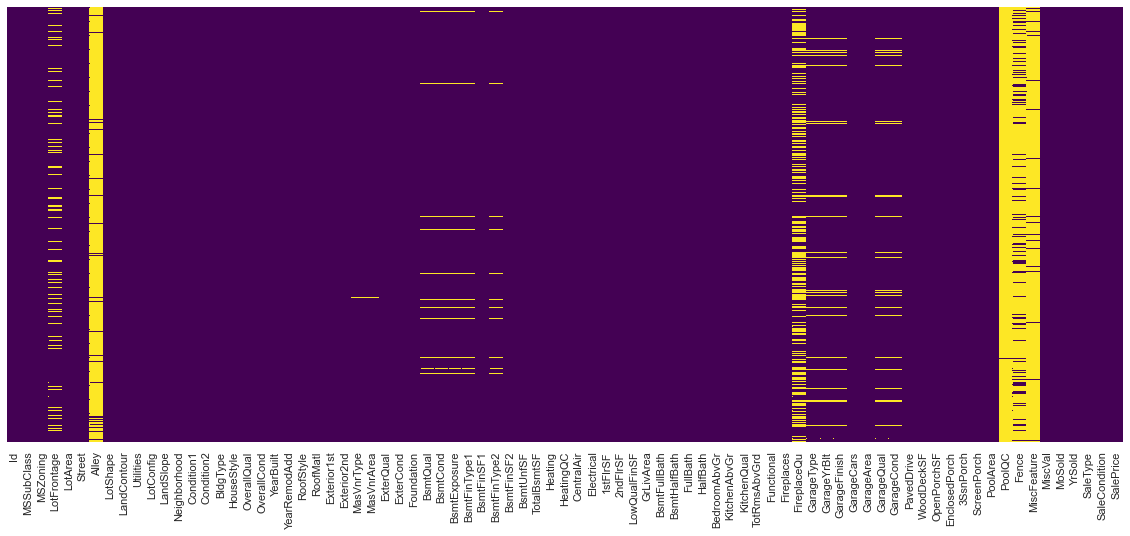

In [14]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(train.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [ ]:
######################################
#
# for classification problems 
# sns.set_style('whitegrid')
# sns.countplot(x='class' , data = df)
#
######################################

In [13]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [28]:
for features in train.columns:
    if train[features].isnull().any() :
        print(features ,":" ,np.round(train[features].isnull().mean() * 100 , 4) , "%")

LotFrontage : 17.7397 %
Alley : 93.7671 %
MasVnrType : 0.5479 %
MasVnrArea : 0.5479 %
BsmtQual : 2.5342 %
BsmtCond : 2.5342 %
BsmtExposure : 2.6027 %
BsmtFinType1 : 2.5342 %
BsmtFinType2 : 2.6027 %
Electrical : 0.0685 %
FireplaceQu : 47.2603 %
GarageType : 5.5479 %
GarageYrBlt : 5.5479 %
GarageFinish : 5.5479 %
GarageQual : 5.5479 %
GarageCond : 5.5479 %
PoolQC : 99.5205 %
Fence : 80.7534 %
MiscFeature : 96.3014 %


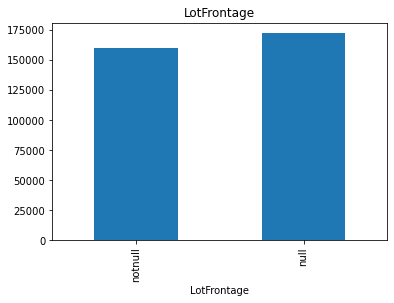

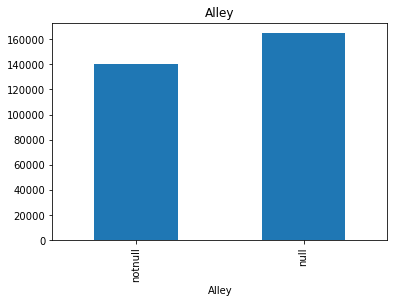

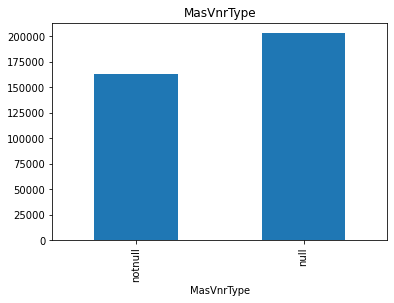

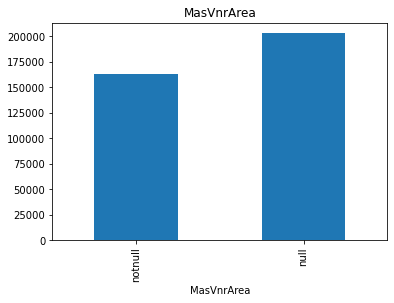

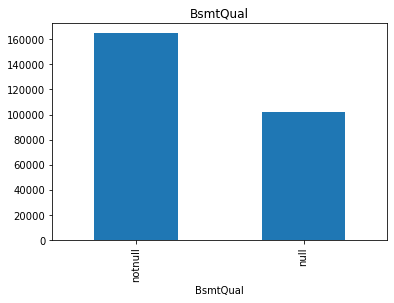

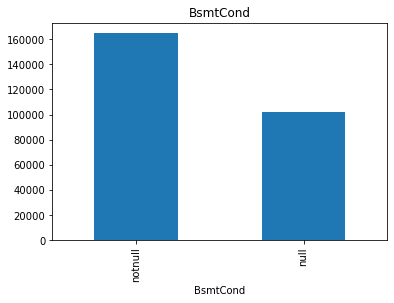

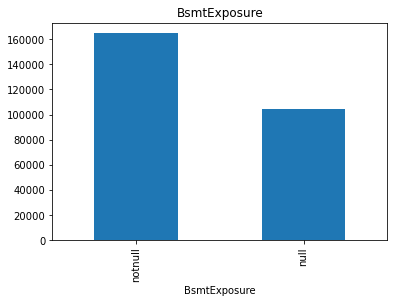

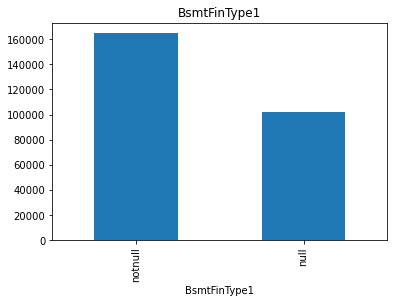

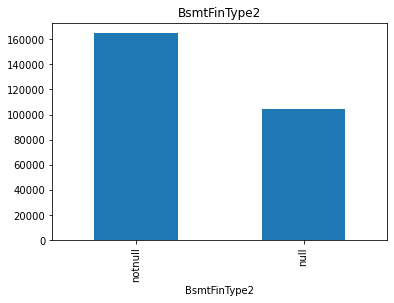

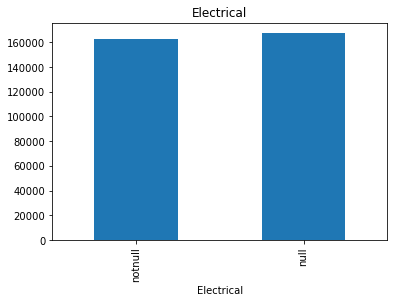

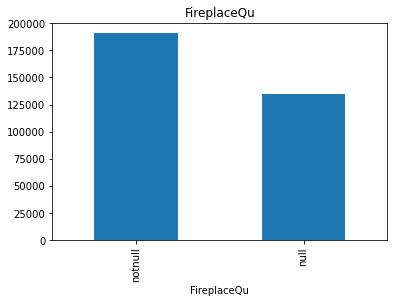

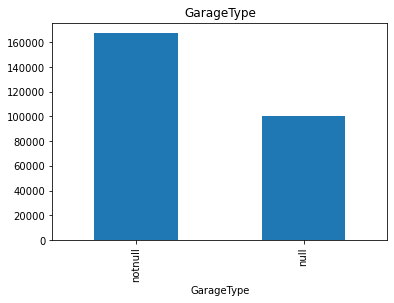

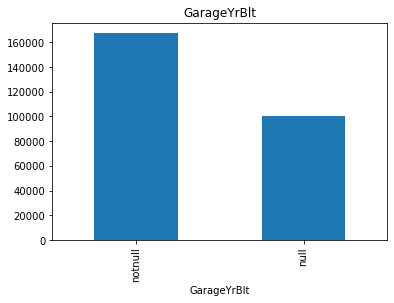

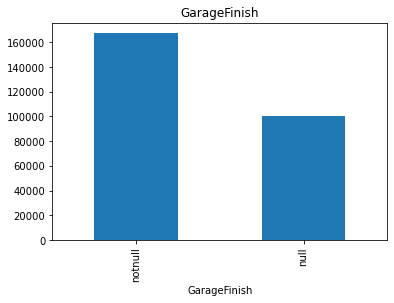

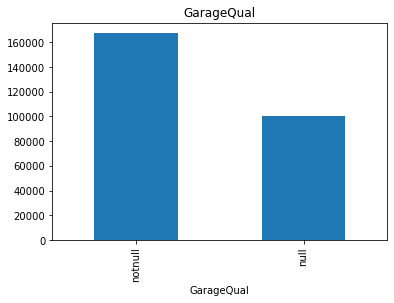

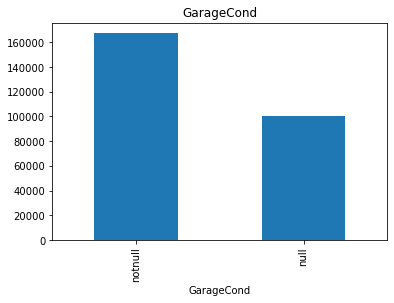

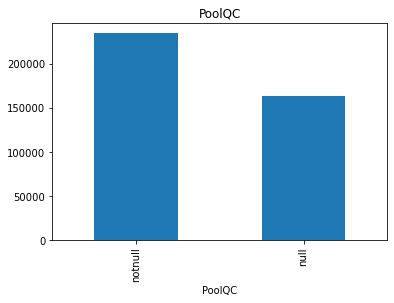

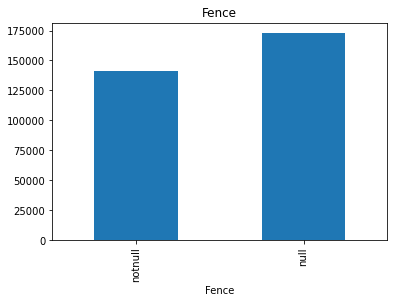

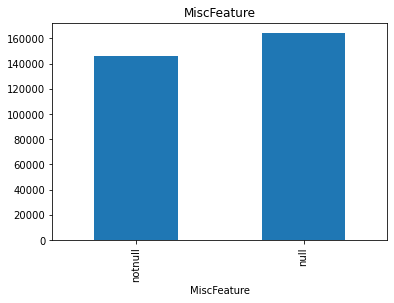

In [53]:
for feature in train.columns:
    if train[feature].isnull().any():
        data = train.copy()
        data[feature] = np.where(data[feature].isnull() , 'null' , 'notnull')
        data.groupby(feature)['SalePrice'].median().plot.bar()
        plt.title(feature)
        plt.show()
     

## Numerical Variables

In [55]:
features = [feature for feature in train.columns if train[feature].dtypes != 'O']
print("No of numerical variables : " ,len(features))

train[features].head()

No of numerical variables :  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [56]:
years = [year for year in train.columns if 'Year' in year or 'Yr' in year]
print(years)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [67]:
for i in years:
    print(i,':' , sorted(train[i].unique()),'\n')

YearBuilt : [1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010] 

YearRemodAdd : [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 199

Text(0.5, 0, 'Sold Year')

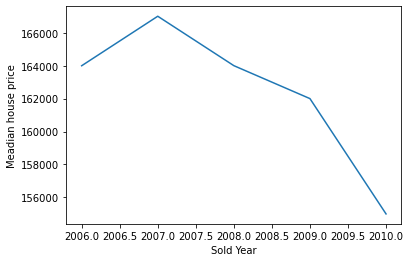

In [72]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel("Meadian house price")
plt.xlabel("Sold Year")

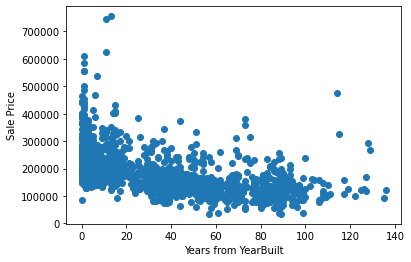

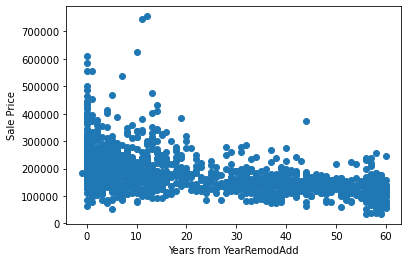

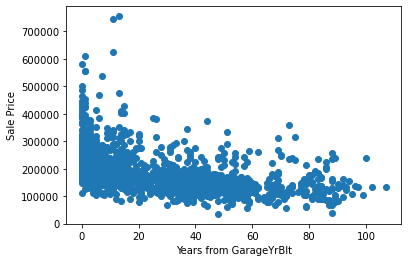

In [82]:
for year in years :
    if year != 'YrSold':
        data = train.copy()
        data[year] = data['YrSold'] - data[year]
        
        plt.scatter(data[year] , data['SalePrice'])
        plt.xlabel("Years from " + year)
        plt.ylabel("Sale Price")
        plt.show()
        

In [88]:
#Discrete Values

discrete = [discrete for discrete in features if len(train[discrete].unique()) < 25 and discrete not in years + ['Id']]

In [89]:
train[discrete].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

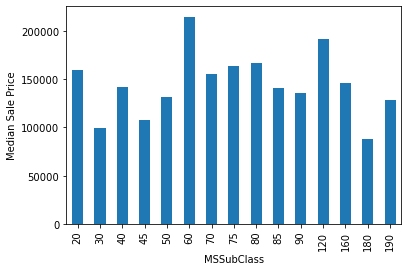

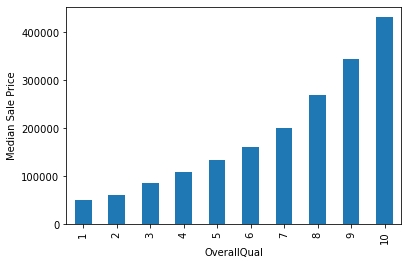

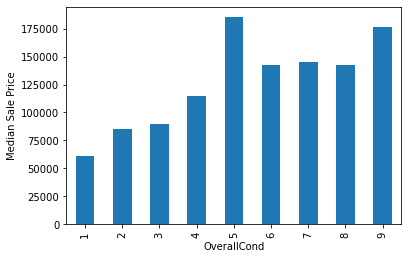

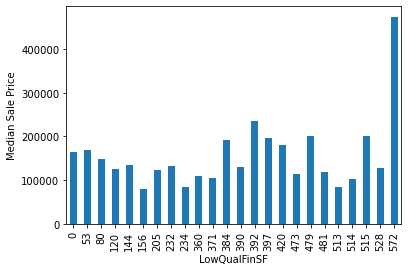

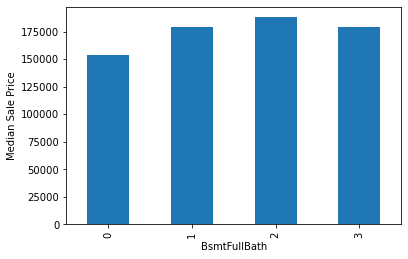

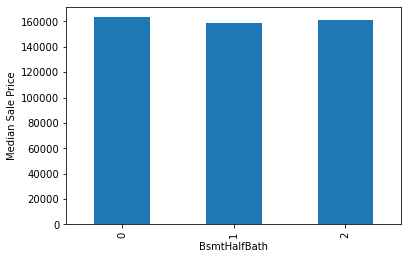

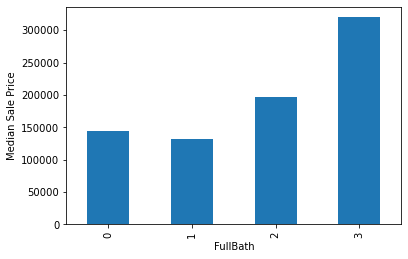

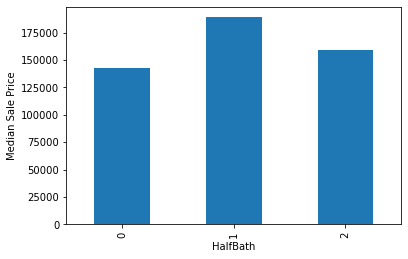

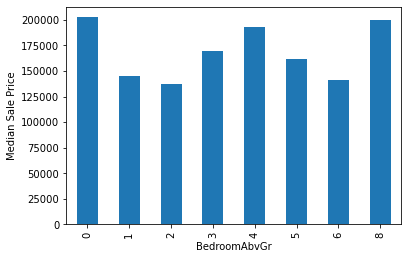

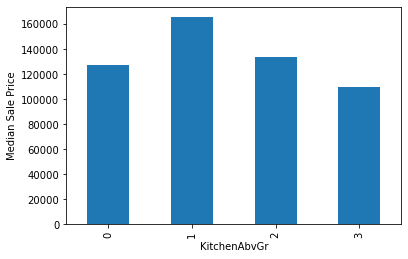

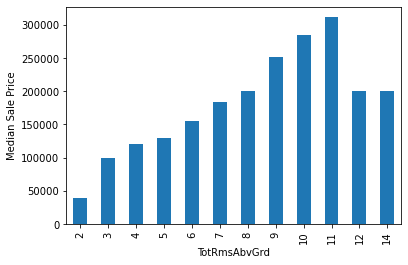

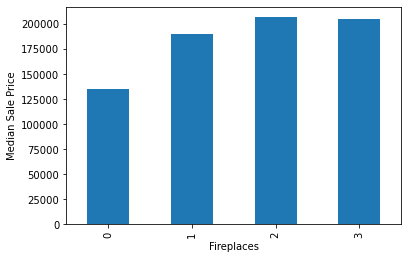

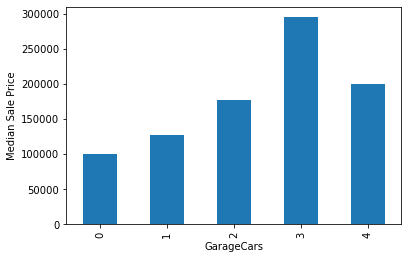

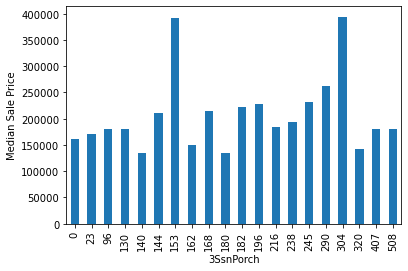

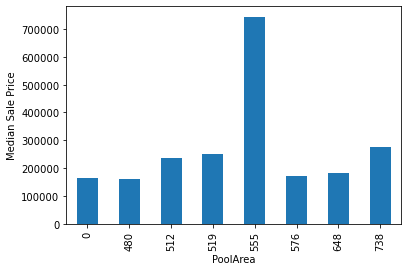

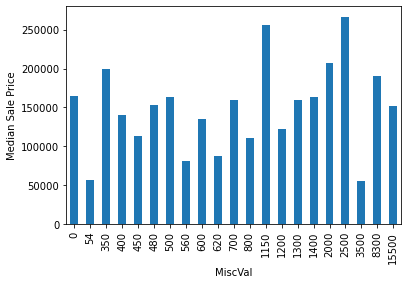

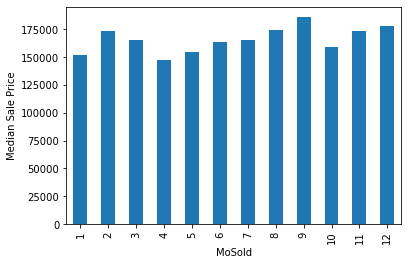

In [91]:
for dis in discrete:
    train.groupby(dis)['SalePrice'].median().plot.bar()
    plt.xlabel(dis)
    plt.ylabel("Median Sale Price")
    plt.show()
    

In [95]:
#continuous values

continuous = [cont for cont in features if cont not in discrete + ['Id'] and cont not in years]
train[continuous].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

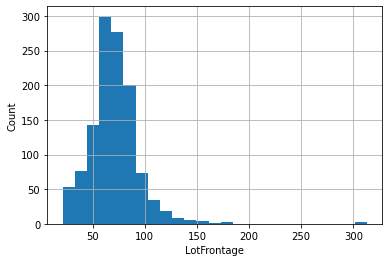

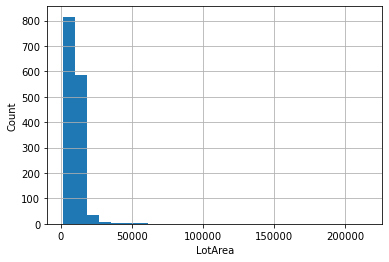

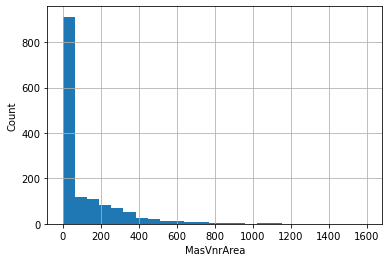

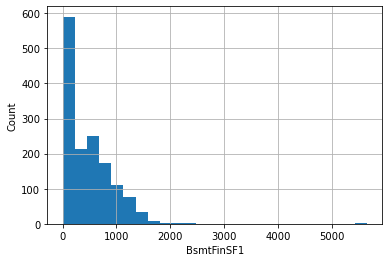

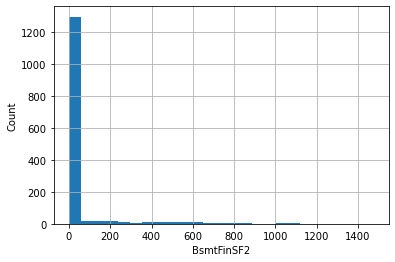

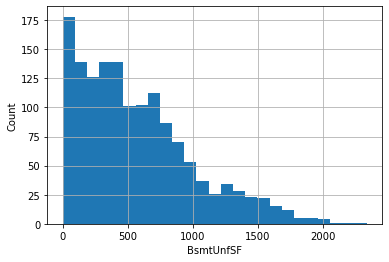

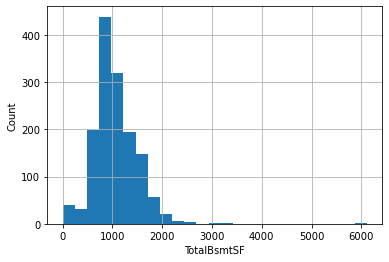

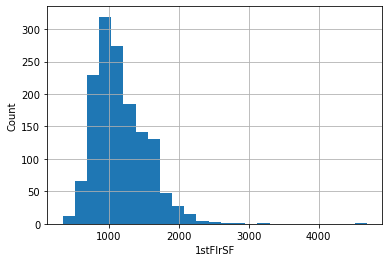

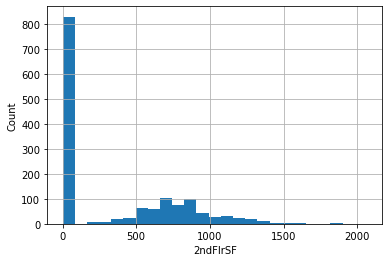

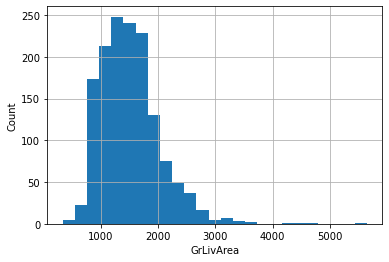

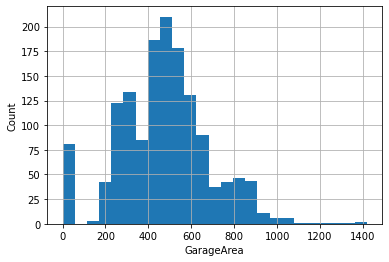

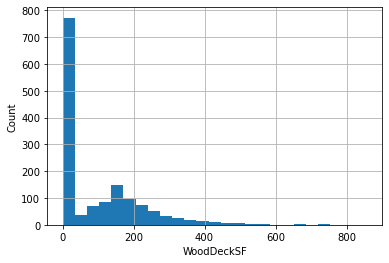

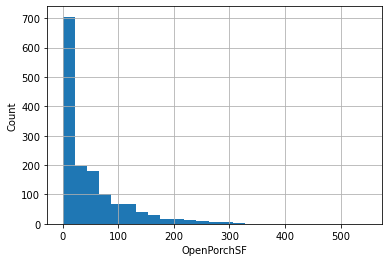

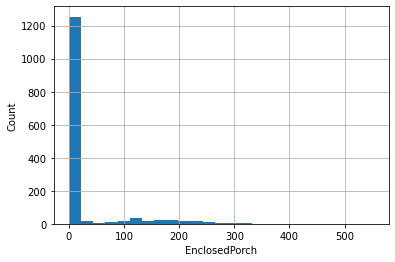

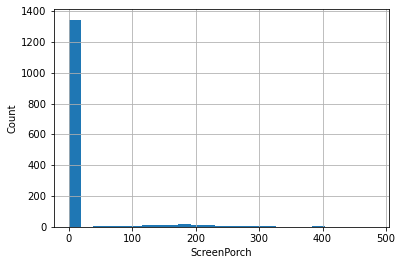

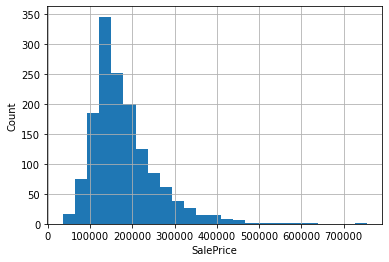

In [102]:
for con in continuous:
    train[con].hist(bins=25)
    plt.ylabel("Count")
    plt.xlabel(con)
    plt.show()

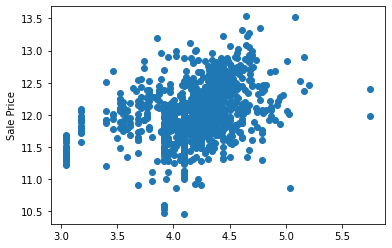

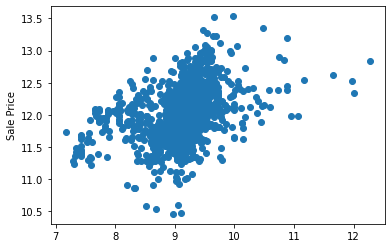

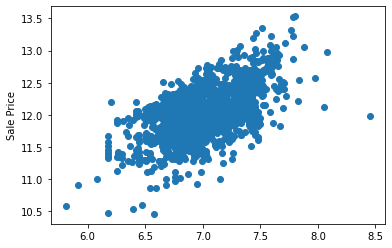

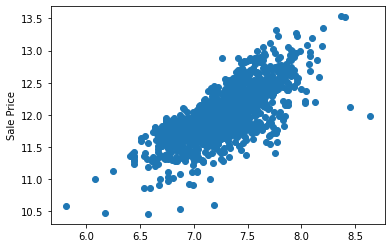

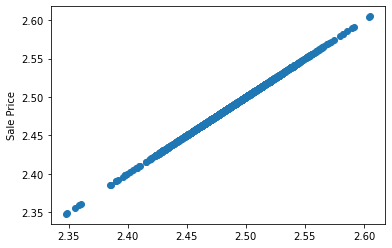

In [104]:
for y in continuous:
    data = train.copy()
    if 0 in data[y].unique():
        pass
    else :
        data[y] = np.log(data[y])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[y] , data['SalePrice'])
        plt.ylabel("Sale Price")
        plt.show()

## Categorical Variables

In [99]:
categorical = [cat for cat in train.columns if train[cat].dtypes == 'O']
train[categorical].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [105]:
for x in categorical:
    print(x , ":  cardinality  =  " , len(train[x].unique()))

MSZoning :  cardinality  =   5
Street :  cardinality  =   2
Alley :  cardinality  =   3
LotShape :  cardinality  =   4
LandContour :  cardinality  =   4
Utilities :  cardinality  =   2
LotConfig :  cardinality  =   5
LandSlope :  cardinality  =   3
Neighborhood :  cardinality  =   25
Condition1 :  cardinality  =   9
Condition2 :  cardinality  =   8
BldgType :  cardinality  =   5
HouseStyle :  cardinality  =   8
RoofStyle :  cardinality  =   6
RoofMatl :  cardinality  =   8
Exterior1st :  cardinality  =   15
Exterior2nd :  cardinality  =   16
MasVnrType :  cardinality  =   5
ExterQual :  cardinality  =   4
ExterCond :  cardinality  =   5
Foundation :  cardinality  =   6
BsmtQual :  cardinality  =   5
BsmtCond :  cardinality  =   5
BsmtExposure :  cardinality  =   5
BsmtFinType1 :  cardinality  =   7
BsmtFinType2 :  cardinality  =   7
Heating :  cardinality  =   6
HeatingQC :  cardinality  =   5
CentralAir :  cardinality  =   2
Electrical :  cardinality  =   6
KitchenQual :  cardinality 

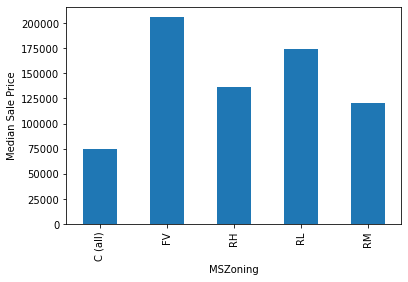

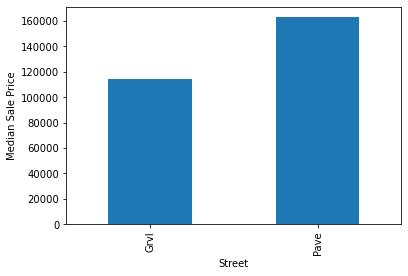

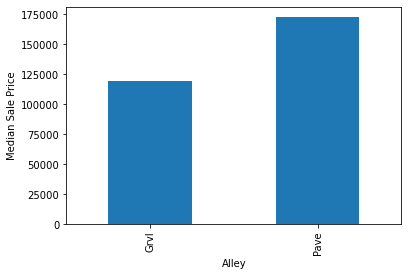

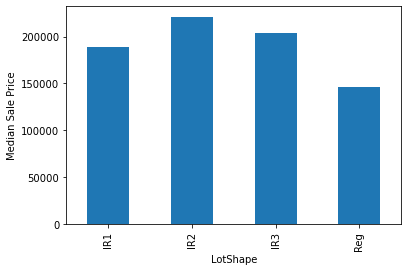

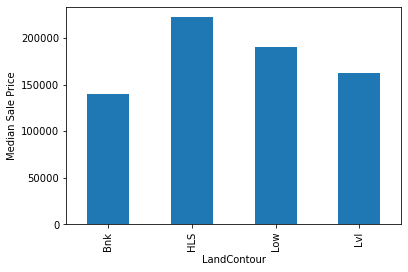

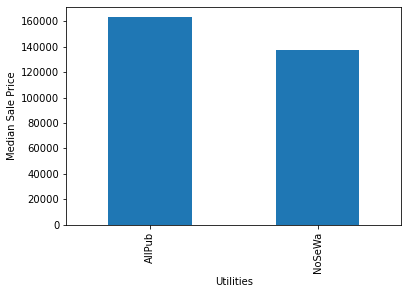

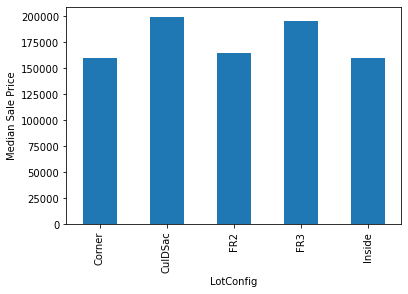

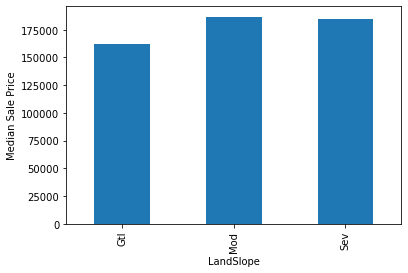

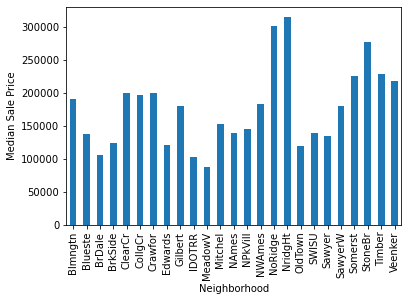

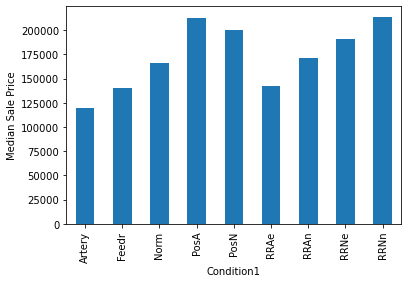

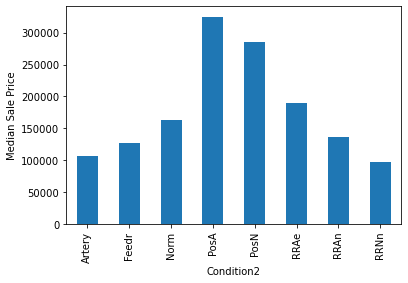

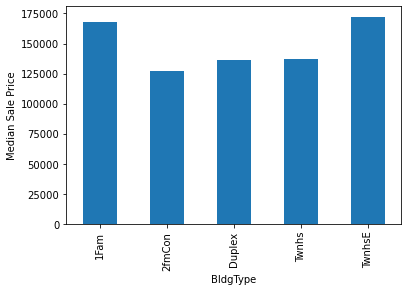

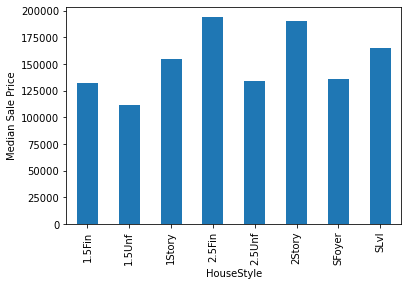

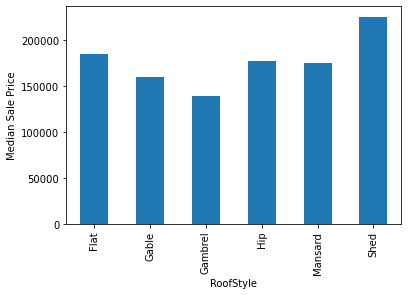

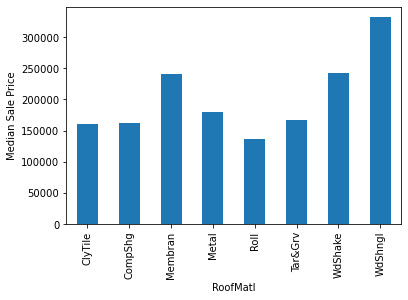

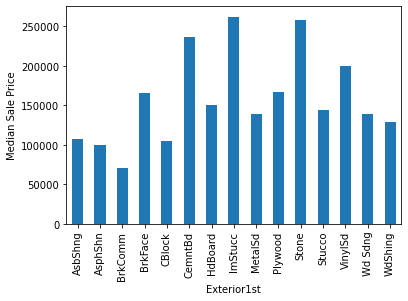

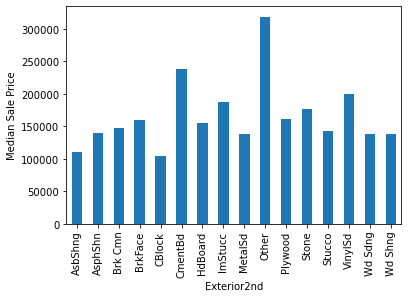

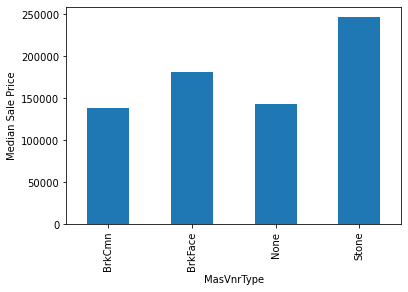

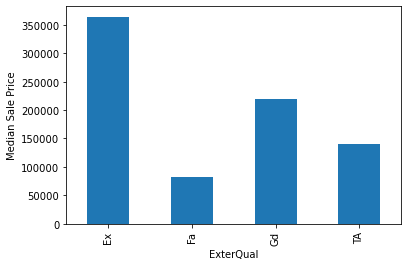

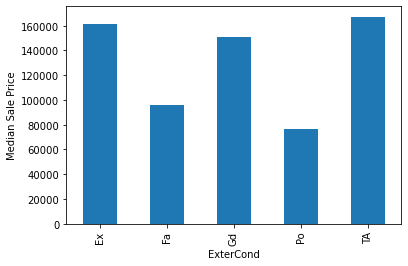

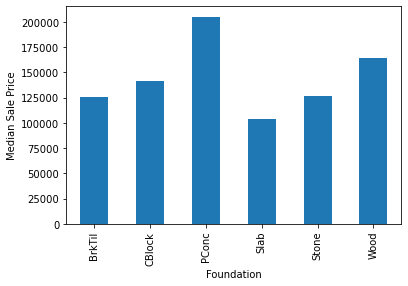

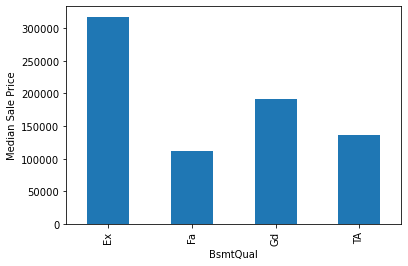

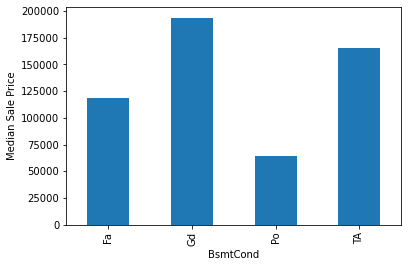

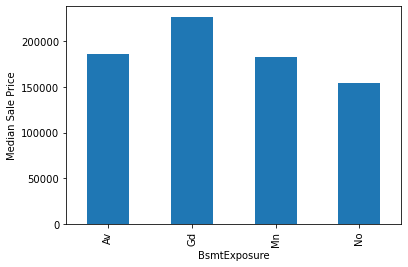

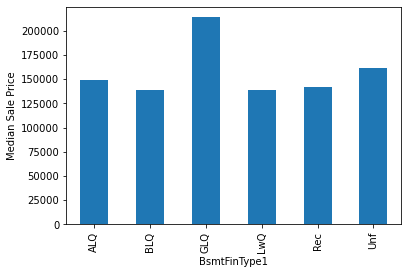

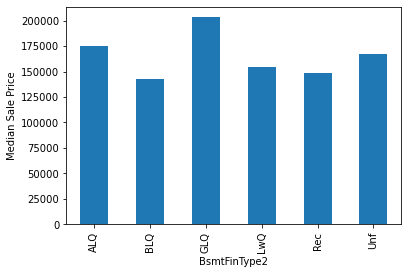

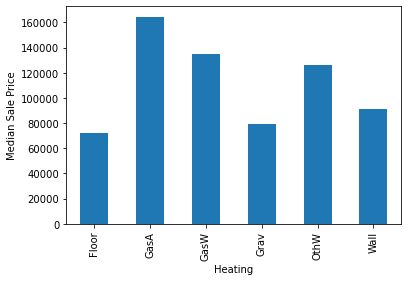

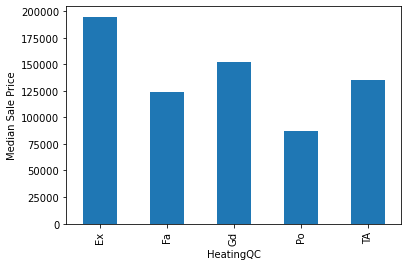

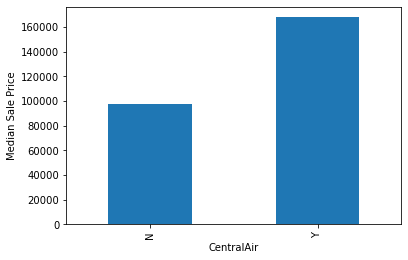

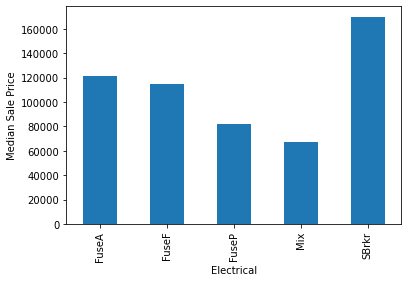

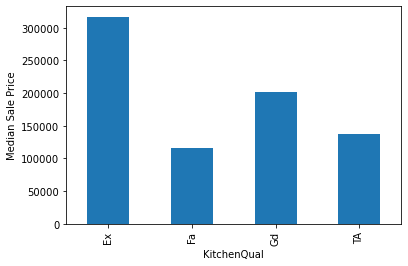

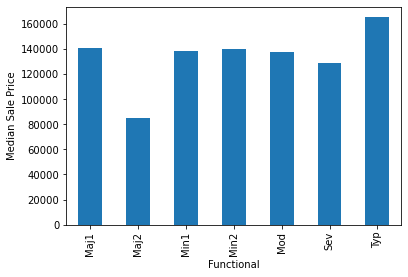

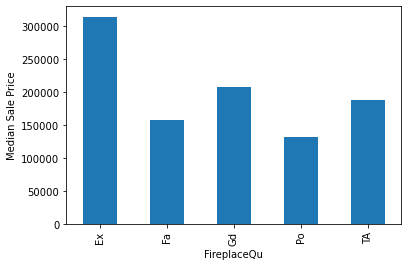

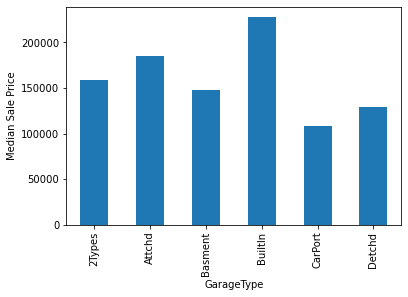

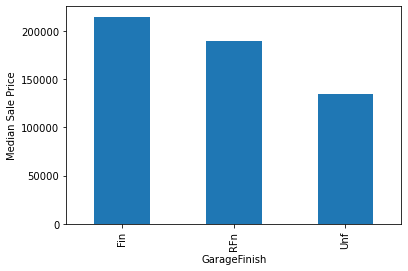

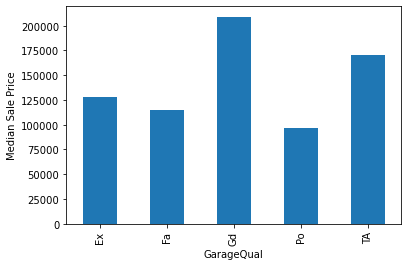

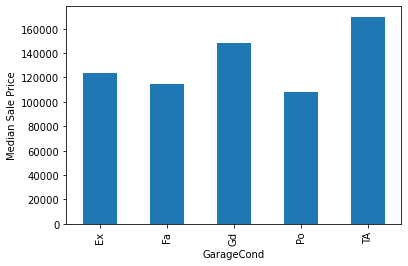

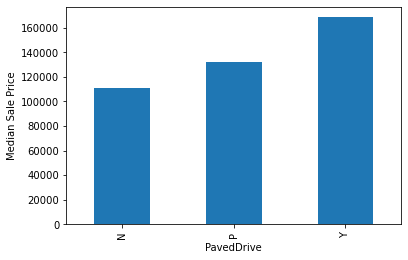

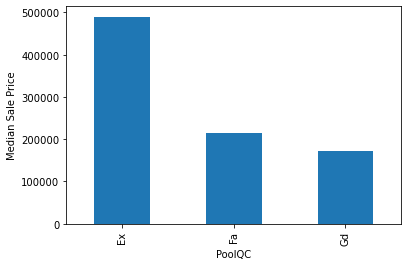

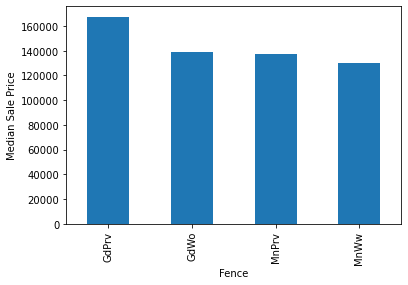

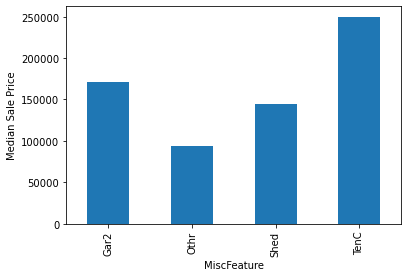

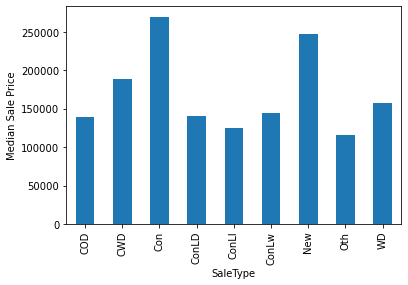

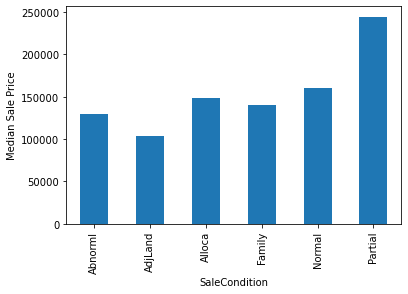

In [100]:
for cat in categorical:
    train.groupby(cat)['SalePrice'].median().plot.bar()
    plt.xlabel(cat)
    plt.ylabel('Median Sale Price')
    plt.show()

## Outliers

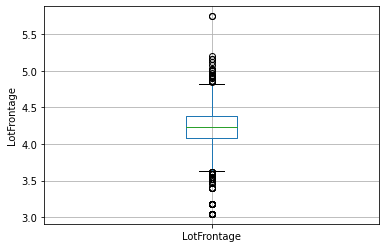

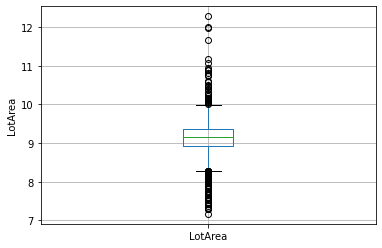

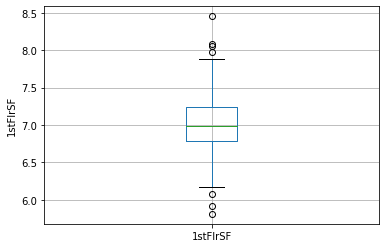

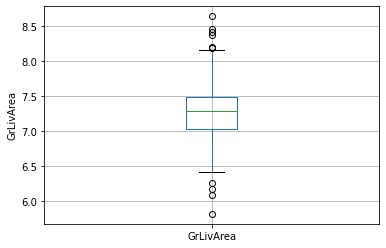

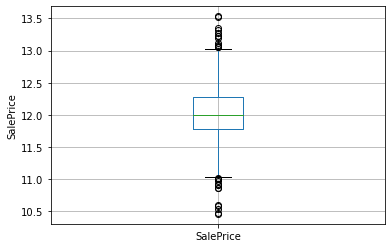

In [101]:
for x in continuous:
    data = train.copy()
    
    if 0 in data[x].unique() :
        pass
    else :
        data[x] = np.log(data[x])
        data.boxplot(column = x)
        plt.ylabel(x)
        plt.show()
        

# EDA Method 2 

In [9]:
!pip install pandas_profiling

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached phik-0.12.0-cp38-cp38-win_amd64.whl (659 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached pydantic-1.8.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl


In [17]:
from pandas_profiling import ProfileReport
from sklearn.datasets import load_diabetes


In [18]:
data = load_diabetes()


In [19]:
df = pd.DataFrame(data = data.data , columns = data.feature_names)
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [23]:
profile = ProfileReport(df, title="data profile" , explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]